In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 5.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.8 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import seaborn as sns
import pandas as pd

# 1 Data Collection

In [5]:
tip=sns.load_dataset("tips")

In [6]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df=pd.DataFrame(tip)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2 Understanding the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
x=df['total_bill']
y=df['tip']

# 3 Stats sum

In [12]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 4 Relationship check

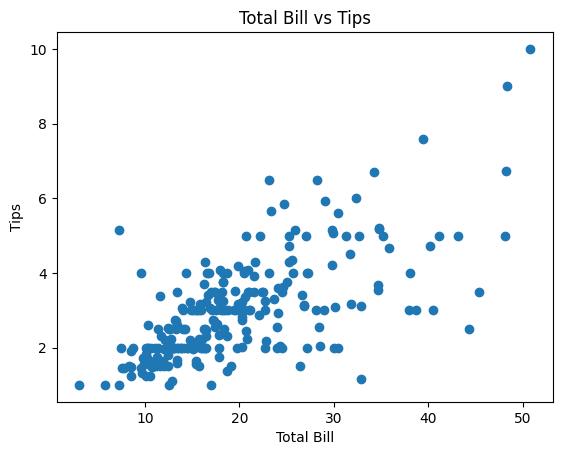

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.title("Total Bill vs Tips")
plt.show()

1) the tip increases as the bill amount increases.
2) Relationship = StraightLine(we can use Linear Regression)

# 5 Feature and Target Separation

In [19]:
x1=df[["total_bill"]]
#input must be in 2d format only
y1=df["tip"]

# 5 Train Test Split
A model must perform well on unseen data

In [23]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 5.0 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 5.3 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 7.6/8.0 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.8/38.5 MB 2.2 MB/s eta 0:00:17
   - -------------------------------------- 1.0/38.5 MB 2.1 MB/s eta 0:00:18
   - -----------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

# 6 Feature Standardization
1.Compare the Co=efficient fairly
2.Avoid the Dominace of large values
3.Prepare for Ridge/Lasso

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Imp:
1.Fit only on training data
2.Prevents the data leakage

# 7 Train Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m): ",model.coef_[0])
print("Intercept (c):",model.intercept_)

Co-efficient(m):  0.9357171400271826
Intercept (c): 3.0877948717948724


In [32]:
y_pred=model.predict(x_test_scaled)

# 8.Model Evaluation

In [33]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2_Score : ",r2)

R2_Score :  0.5449381659234664


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mse: ",mse)
print("Rmse :",rmse)

Mse:  0.5688142529229538
Rmse : 0.7541977545199626


# 9 Visualize the Best fit line

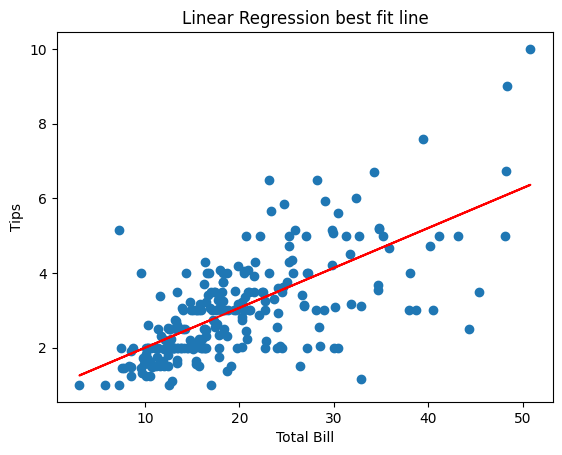

In [38]:
plt.scatter(x1, y1)
plt.plot(x1, model.predict(scaler.transform(x1)), color='red')
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.title("Linear Regression best fit line")
plt.show()

# 10 I/O Real time

In [41]:
bill_amount = float(input("Enter the bill amount: "))
bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)
print(f"Predicted Tip: {predict_tip[0]:.2f}")


Predicted Tip: 321.82


d:\3YR\TEKWORKS\DEC-17\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
